In [2]:
import pandas as pd
import pandasql as ps
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import jarque_bera

# from sklearn.preprocessing import LabelEncoder


import geopandas as gpd
# import psycopg2
# import plotly.express as px

In [4]:
# Higher square footage increases home sale price

In [5]:
dfAll = pd.read_csv("../../references/dfAll.csv")
dfAll.columns

Index(['MajorMinor', 'SalePrice', 'PropertyType', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'StreetName', 'StreetType', 'ZipCode', 'Stories',
       'BldgGrade', 'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'ViewUtilization', 'Bedrooms', 'BathHalfCount',
       'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory',
       'FpFreestanding', 'YrBuilt', 'YrRenovated', 'Condition', 'WfntLocation',
       'SqFtLot', 'TrafficNoise', 'AirportNoise', 'PowerLines',
       'OtherNuisances'],
      dtype='object')

In [6]:
fsuckym = ols(formula="SalePrice ~ SqFtTotLiving", data=dfAll).fit()

In [7]:
fsuckym.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.039e+04
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:06:52   Log-Likelihood:            -2.8940e+05
No. Observations:               19911   AIC:                         5.788e+05
Df Residuals:                   19909   BIC:                         5.788e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.242e+04   8487.811      1.464      0.143   -4214.409    2.91e+04
SqFtTotLiving   367.7104      3.607    101.951      0.000     360.641     374.780
==============================================================================
Omnibus:                    28886.705   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26563526.276
Skew:                           8.374   Prob(JB):                         0.00
Kurtosis:                     181.152   Cond. No.                     5.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
ssuckym = ols(formula="SalePrice ~ SqFtTotLiving + ZipCode", data=dfAll).fit()

In [9]:
ssuckym.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     146.7
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:06:52   Log-Likelihood:            -2.4685e+05
No. Observations:               17270   AIC:                         4.940e+05
Df Residuals:                   17102   BIC:                         4.953e+05
Df Model:                         167                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               1.79e+05   3.92e+05      0.456      0.648    -5.9e+05    9.48e+05
ZipCode[T.98]          5.481e+05    4.8e+05      1.141      0.254   -3.94e+05    1.49e+06
ZipCode[T.98001]      -3.554e+05   3.93e+05     -0.905      0.366   -1.13e+06    4.15e+05
ZipCode[T.98001.0]    -3.579e+05   3.98e+05     -0.900      0.368   -1.14e+06    4.22e+05
ZipCode[T.98002]      -3.016e+05   3.93e+05     -0.767      0.443   -1.07e+06    4.69e+05
ZipCode[T.98002.0]     -2.69e+05   4.04e+05     -0.665      0.506   -1.06e+06    5.23e+05
ZipCode[T.98003]      -3.367e+05   3.93e+05     -0.857      0.392   -1.11e+06    4.34e+05
ZipCode[T.98003.0]    -3.601e+05   3.96e+05     -0.910      0.363   -1.14e+06    4.16e+05
ZipCode[T.98004]       1.251e+06   3.93e+05      3.182      0.001     4.8e+05    2.02e+06
ZipCode[T.98004.0]     2.296e+06   3.99e+05      5.758      0.000    1.51e+06    3.08e+06
ZipCode[T.98005]       3.421e+05   3.94e+05      0.868      0.386   -4.31e+05    1.11e+06
ZipCode[T.98005.0]     9.326e+04   4.08e+05      0.228      0.819   -7.07e+05    8.93e+05
ZipCode[T.98006]       1.354e+05   3.93e+05      0.345      0.730   -6.35e+05    9.05e+05
ZipCode[T.98006.0]      1.84e+05   3.97e+05      0.463      0.643   -5.95e+05    9.63e+05
ZipCode[T.98007]       5.485e+04   3.94e+05      0.139      0.889   -7.18e+05    8.28e+05
ZipCode[T.98007.0]     1.596e+05    4.3e+05      0.372      0.710   -6.83e+05       1e+06
ZipCode[T.98008]       1.576e+05   3.93e+05      0.401      0.688   -6.13e+05    9.28e+05
ZipCode[T.98008.0]     6903.0166   4.07e+05      0.017      0.986   -7.91e+05    8.05e+05
ZipCode[T.98010]      -2.715e+05   3.96e+05     -0.685      0.493   -1.05e+06    5.05e+05
ZipCode[T.98010.0]    -1.944e+05   4.39e+05     -0.443      0.658   -1.05e+06    6.65e+05
ZipCode[T.98011]      -1.564e+05   3.94e+05     -0.397      0.691   -9.28e+05    6.15e+05
ZipCode[T.98011.0]    -1.706e+05   4.07e+05     -0.419      0.675   -9.68e+05    6.27e+05
ZipCode[T.98014]      -9.054e+04   3.95e+05     -0.229      0.819   -8.64e+05    6.83e+05
ZipCode[T.98014.0]     5.319e+05   4.53e+05      1.174      0.240   -3.56e+05    1.42e+06
ZipCode[T.98019]      -2.082e+05   3.94e+05     -0.529      0.597    -9.8e+05    5.64e+05
ZipCode[T.98019.0]    -3.674e+05   4.39e+05     -0.838      0.402   -1.23e+06    4.92e+05
ZipCode[T.98022]      -3.324e+05   3.93e+05     -0.845      0.398    -1.1e+06    4.38e+05
ZipCode[T.98022.0]    -3.376e+05   3.99e+05     -0.846      0.397   -1.12e+06    4.44e+05
ZipCode[T.98023]      -3.975e+05   3.93e+05     -1.012      0.311   -1.17e+06    3.72e+05
ZipCode[T.98023-7841] -3.584e+05   5.55e+05     -0.646      0.518   -1.45e+06    7.29e+05
ZipCode[T.98023.0]    -3.266e+05   3.98e+05     -0.822      0.411   -1.11e+06    4.53e+05
ZipCode[T.98024]      -

In [10]:
pvc_df = dfAll[['SalePrice','ZipCode','SqFtTotLiving']]
pvc_df.dropna(inplace=True)

<ipython-input-10-2fbe6d81310b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df.dropna(inplace=True)


In [11]:
pvc_df

,SalePrice,ZipCode,SqFtTotLiving
0,560000,98019,1930.0
1,435000,98038,1975.0
2,775000,98177,2080.0
4,1255000,98006,2680.0
5,400000,98030,2540.0
...,...,...,...
19904,835000,98126,2380.0
19906,700988,98058,2790.0
19907,1550000,98040,3830.0
19908,930000,98116,2600.0


In [12]:
pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(str)
pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].str.split('.').str[0]




<ipython-input-12-a0f778784b5b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCode'].str.split('-').str[0]
<ipython-input-12-a0f778784b5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pvc_df['ZipCodeFix'] = pvc_df['ZipCodeFix'].astype(float)
<ipython-input-12-a0f778784b5b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [13]:
stupid = pd.DataFrame(ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().params)

In [14]:
# stupid[0] = stupid[0].astype(str)
# stupid.to_csv('test.csv')

In [15]:
ols(formula="SalePrice ~ SqFtTotLiving + ZipCodeFix", data=pvc_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     288.7
Date:                Wed, 04 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:06:55   Log-Likelihood:            -2.4705e+05
No. Observations:               17270   AIC:                         4.943e+05
Df Residuals:                   17187   BIC:                         4.949e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.749e+05   3.96e+05      0.442      0.659   -6.01e+05    9.51e+05
ZipCodeFix[T.98]     5.447e+05   4.85e+05      1.124      0.261   -4.05e+05    1.49e+06
ZipCodeFix[T.98001] -3.553e+05   3.96e+05     -0.897      0.370   -1.13e+06    4.21e+05
ZipCodeFix[T.98002] -2.982e+05   3.97e+05     -0.752      0.452   -1.08e+06    4.79e+05
ZipCodeFix[T.98003] -3.405e+05   3.96e+05     -0.859      0.390   -1.12e+06    4.36e+05
ZipCodeFix[T.98004]  1.378e+06   3.97e+05      3.474      0.001       6e+05    2.15e+06
ZipCodeFix[T.98005]  3.138e+05   3.98e+05      0.789      0.430   -4.65e+05    1.09e+06
ZipCodeFix[T.98006]  1.394e+05   3.96e+05      0.352      0.725   -6.37e+05    9.16e+05
ZipCodeFix[T.98007]  6.005e+04   3.98e+05      0.151      0.880    -7.2e+05     8.4e+05
ZipCodeFix[T.98008]   1.49e+05   3.97e+05      0.376      0.707   -6.28e+05    9.26e+05
ZipCodeFix[T.98010] -2.655e+05   3.99e+05     -0.665      0.506   -1.05e+06    5.17e+05
ZipCodeFix[T.98011] -1.579e+05   3.97e+05     -0.398      0.691   -9.36e+05     6.2e+05
ZipCodeFix[T.98014] -6.738e+04   3.98e+05     -0.169      0.866   -8.48e+05    7.13e+05
ZipCodeFix[T.98019] -2.139e+05   3.97e+05     -0.538      0.590   -9.93e+05    5.65e+05
ZipCodeFix[T.98022] -3.328e+05   3.97e+05     -0.839      0.401   -1.11e+06    4.44e+05
ZipCodeFix[T.98023] -3.924e+05   3.96e+05     -0.991      0.322   -1.17e+06    3.84e+05
ZipCodeFix[T.98024] -1.108e+05      4e+05     -0.277      0.781   -8.94e+05    6.72e+05
ZipCodeFix[T.98027] -6.885e+04   3.97e+05     -0.174      0.862   -8.46e+05    7.08e+05
ZipCodeFix[T.98028] -1.705e+05   3.97e+05     -0.430      0.667   -9.48e+05    6.07e+05
ZipCodeFix[T.98029] -1.112e+04   3.97e+05     -0.028      0.978   -7.89e+05    7.67e+05
ZipCodeFix[T.98030] -3.363e+05   3.97e+05     -0.848      0.397   -1.11e+06    4.41e+05
ZipCodeFix[T.98031] -3.221e+05   3.96e+05     -0.813      0.416    -1.1e+06    4.55e+05
ZipCodeFix[T.98032] -3.448e+05   3.97e+05     -0.868      0.385   -1.12e+06    4.34e+05
ZipCodeFix[T.98033]  3.201e+05   3.96e+05      0.808      0.419   -4.57e+05     1.1e+06
ZipCodeFix[T.98034]  2558.1745   3.96e+05      0.006      0.995   -7.74e+05    7.79e+05
ZipCodeFix[T.98038] -3.011e+05   3.96e+05     -0.760      0.447   -1.08e+06    4.75e+05
ZipCodeFix[T.98039]  2.368e+06   4.02e+05      5.892      0.000    1.58e+06    3.16e+06
ZipCodeFix[T.98040]  6.371e+05   3.97e+05      1.606      0.108    -1.4e+05    1.41e+06
ZipCodeFix[T.98042] -3.408e+05   3.96e+05     -0.860      0.390   -1.12e+06    4.36e+05
ZipCodeFix[T.98045] -1.824e+05   3.97e+05     -0.460      0.646    -9.6e+05    5.95e+05
ZipCodeFix[T.98047] -2.694e+05   4.02e+05     -0.671      0.502   -1.06e+06    5.18e+05
ZipCodeFix[T.98050]  -1.29e+05   4.23e+05     -0.305      0.760   -9.58e+05       7e+05
Zip

In [16]:
sf = "///Users/timothycummins/Downloads/tl_2019_us_zcta510"
dbsf = gpd.read_file(sf)
dbsf['ZipCodeFix'] = dbsf['ZCTA5CE10']

In [17]:
mergeddf = pd.merge(pvc_df,dbsf,how = 'left', on = 'ZipCodeFix')

In [18]:
mergeddf = mergeddf.drop(columns=['GEOID10','CLASSFP10','MTFCC10','FUNCSTAT10','AWATER10','ALAND10'])

In [19]:
mergeddf

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry
0,560000,98019,1930.0,98019,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7..."
1,435000,98038,1975.0,98038,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356..."
2,775000,98177,2080.0,98177,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7..."
3,1255000,98006,2680.0,98006,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5..."
4,400000,98030,2540.0,98030,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3..."
...,...,...,...,...,...,...,...,...
17265,835000,98126,2380.0,98126,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5..."
17266,700988,98058,2790.0,98058,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4..."
17267,1550000,98040,3830.0,98040,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5..."
17268,930000,98116,2600.0,98116,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5..."


In [20]:
zipcoef = pd.read_csv("./test_reply.csv")
zipcoef['ZipCodeFix'] = zipcoef['ZipCodeFix'].astype(str)

In [21]:
mergeddf2 = pd.merge(mergeddf,zipcoef,how = 'left', on = 'ZipCodeFix')

In [22]:
mergeddf2['coef'] = mergeddf2['coef'].astype(float)
mergeddf2.dropna(inplace=True) 
mergeddf2['coef'] = mergeddf2['coef'].astype(int)
mergeddf2

,SalePrice,ZipCode,SqFtTotLiving,ZipCodeFix,ZCTA5CE10,INTPTLAT10,INTPTLON10,geometry,coef
0,560000,98019,1930.0,98019,98019,+47.7343332,-121.8553066,"POLYGON ((-122.02800 47.73249, -122.02780 47.7...",-213859
1,435000,98038,1975.0,98038,98038,+47.4193780,-121.9580080,"MULTIPOLYGON (((-122.03567 47.45110, -122.0356...",-301110
2,775000,98177,2080.0,98177,98177,+47.7423108,-122.3766354,"POLYGON ((-122.39883 47.77794, -122.39497 47.7...",26666
3,1255000,98006,2680.0,98006,98006,+47.5576267,-122.1510048,"POLYGON ((-122.20193 47.54667, -122.20162 47.5...",139417
4,400000,98030,2540.0,98030,98030,+47.3672135,-122.1980509,"POLYGON ((-122.23111 47.38665, -122.22989 47.3...",-336256
...,...,...,...,...,...,...,...,...,...
17265,835000,98126,2380.0,98126,98126,+47.5556468,-122.3795899,"POLYGON ((-122.39995 47.59078, -122.39678 47.5...",1888
17266,700988,98058,2790.0,98058,98058,+47.4427368,-122.1239733,"POLYGON ((-122.18656 47.42391, -122.18655 47.4...",-299086
17267,1550000,98040,3830.0,98040,98040,+47.5640042,-122.2312143,"POLYGON ((-122.26683 47.58737, -122.26672 47.5...",637124
17268,930000,98116,2600.0,98116,98116,+47.5742452,-122.4002222,"POLYGON ((-122.42494 47.57829, -122.42319 47.5...",160355


In [35]:

merge3 = pd.merge(zipcoef,dbsf,how = 'left', on = 'ZipCodeFix')
merge3 = merge3.drop(columns=['GEOID10','CLASSFP10','MTFCC10','FUNCSTAT10','AWATER10','ALAND10','INTPTLAT10','INTPTLON10','ZCTA5CE10'])
merge3['coef'] = mergeddf2['coef'].astype(float)
merge3.dropna(inplace=True) 
merge3['coef'] = mergeddf2['coef'].astype(int)

merge3

,ZipCodeFix,coef,geometry
0,98001,-213859,"POLYGON ((-122.30686 47.28972, -122.30682 47.2..."
1,98002,-301110,"POLYGON ((-122.23252 47.30315, -122.23245 47.3..."
2,98003,26666,"POLYGON ((-122.34485 47.29670, -122.34359 47.2..."
3,98004,139417,"POLYGON ((-122.23513 47.65016, -122.23380 47.6..."
4,98005,-336256,"POLYGON ((-122.19178 47.58925, -122.19158 47.5..."
...,...,...,...
75,98198,460140,"POLYGON ((-122.34359 47.40850, -122.33529 47.4..."
76,98199,-340820,"POLYGON ((-122.44011 47.66420, -122.43698 47.6..."
77,98224,-206911,"POLYGON ((-121.74783 47.67532, -121.74773 47.6..."
78,98288,-279702,"POLYGON ((-121.52166 47.70031, -121.52112 47.7..."


AttributeError: 'Line2D' object has no property 'column'

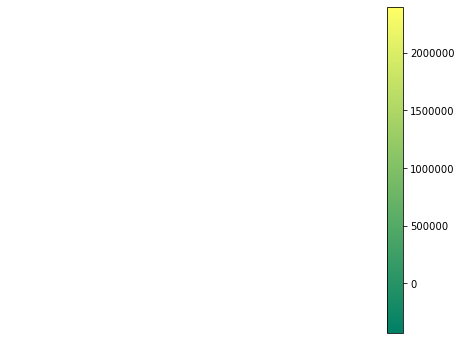

In [30]:
plt.rcParams['figure.figsize'] = [8, 6] #height, width

vmin, vmax = -430000, 2400000

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(8,6))

# remove the axis
ax.axis('off')

# add a title and annotation
# ax.set_title('''\nCount of 'Opportunity Youth' \n in South King County \n \n''', fontdict={'fontsize': '25', 'fontweight' : '3'})

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='summer', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([])

cbar = fig.colorbar(sm)

# create map
merge3.plot(column=(merge3['coef']), cmap='summer', linewidth=0.8, ax=ax, edgecolor='1')
# Add Labels
merge3['coords'] = merge3['geometry'].apply(lambda x: x.representative_point().coords[:])
merge3['coords'] = [coords[0] for coords in merge3['coords']]

# Display names 
# for idx, row in skc.iterrows():
    # plt.annotate(s=row['OYP'], xy=row['coords'],horizontalalignment='center',fontsize=5)
#     plt.annotate(s=row['PUMA'], xy=row['coords'],horizontalalignment='center',fontsize=10)